## 선형모델 - linear model

#### <font style="color:red">회귀 모델은 특성이 많아질수록 선형 모델의 성능이 높아져 과대적합(Overfitting)이 될 가능성이 높아짐.</font>

In [1]:
from IPython.display import display, Image

### 학습 내용
* 샘플의 특성이 104개인 것을 활용하여 릿지 회귀, 라쏘 회귀에 대해 알아본다.
* 릿지 회귀(Ridge Regression) - L2에 대해 실습을 통해 알아본다.
* 라쏘 회귀(Lasso Regression) - L1에 대해 실습을 통해 알아본다.
* 릿지 회귀(Ridge Regression)의 alpha의 변경
* 라쏘 회귀(Lasso Regression)의 alpha의 변경

### 모델에 제한을 두기(규제)
* (1) 릿지 회귀 - 모델에서의 계수를 0에 가깝게 만든다.

* (2) 라쏘 회귀 - 실제로 계수를 0으로 만든다.
      y = w1 * x1 + w2 * x2 + b (w1, w2가 계수)

### (1) 릿지 회귀(Ridge)  - L2
* 릿지 회귀에서의 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위한 하나와 추가 제약 조건을 만족시키기 위한 목적
* <b>가중치의 절대값</b>을 가능한 작게 만든다. w(기울기)의 모든 값이 0에 가깝게 되길 원한다. <b>(규제) - Regularization</b>
   * <b>모든 특성이 출력에 주는 영향을 작게</b> 만든다.
* 규제(Regularization)을 하는 이유 - 과대적합(Overfitting)이 되지 않도록 모델을 강제로 제한한다. 
* 릿지 회귀의 규제 방식은 L2규제라고하기도 한다.
* 릿지 회귀는 <b>linear_model.Ridge</b>에 구현되어 있음.

In [3]:
import mglearn

In [16]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge   # 릿지회귀
import pandas as pd

### 한글 설정

In [17]:
# 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

### 일반 회귀 모델 살펴보기 

In [18]:
### 데이터 셋 준비 
boston = load_boston()  # 데이터 셋 불러오기
print(type(boston.target), type(boston.data))
print(boston.target.shape, boston.data.shape)

df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(506,) (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
df_boston.loc[:, 'CRIM':'LSTAT'].shape

(506, 13)

In [26]:
X = df_boston.loc[:, 'CRIM':'LSTAT']         # 입력 데이터 
y = boston.target

print("정규화,확장 전 데이터 셋 : ", X.shape, y.shape)
normalize_X = MinMaxScaler().fit_transform(X)  # 입력 데이터 정규화
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(normalize_X)  # 데이터 feature 추가 생성

print("정규화, 추가 생성 : ", ex_X.shape, y.shape)

정규화,확장 전 데이터 셋 :  (506, 13) (506,)
정규화, 추가 생성 :  (506, 104) (506,)


In [25]:
from sklearn.linear_model import LinearRegression

### 일반 선형 회귀 모델을 이용한 학습 및 평가

In [27]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 데이터 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.79


### 릿지(Ridge) 회귀 적용 : alpha = 1

In [29]:
# from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print(ridge)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
훈련 세트 점수 : 0.87
테스트 세트 점수 : 0.81


### 확인 결과
* <b>선형회귀는 과대적합</b>, Ridge는 규제로 인해 <b>과대적합이 적어진다.</b>
* alpha을 이용하여 훈련세트의 성능 대비 모델을 얼마나 단순화 시킬 수 있는지 지정 가능.(기본값 alpha=1.0)
* alpha의 계수를 높이면 w의 계수를 0에 가깝게 만든다. 계수가 0에 가까워지면 일반화에 도움이 된다.(훈련세트 성능이 나빠짐)
* alpha의 게수를 줄이면 그만큼 풀리면서 LinearRegression 으로 모델과 점점 가까워짐

### 릿지(Ridge) 회귀 적용 : alpha = 10

In [30]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(ridge10)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.73


### 릿지(Ridge) 회귀 적용 : alpha = 0.1

In [36]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge01)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
훈련 세트 점수 : 0.92
테스트 세트 점수 : 0.82


In [37]:
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)

### 릿지 회귀(Ridge)-alpha
<pre>
A. 앞의 예제는 alpha를 10, 0.1, 0.01으로 이용
B. alpha는 모델을 얼마나 많이 규제할지 조절한다.
</pre>

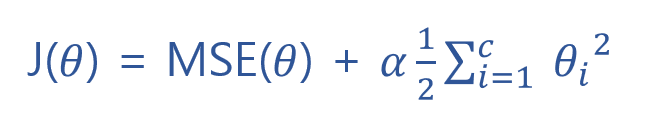

In [47]:
display(Image(filename='img/ridge01.png'))

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Ridge alpha=0.01')

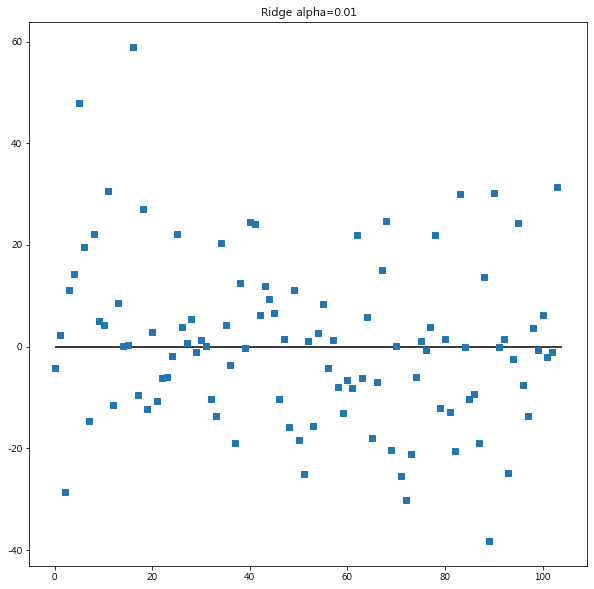

In [39]:
fig = plt.figure(figsize=(10,10))
plt.hlines(0,0, len(ridge001.coef_))
plt.plot(ridge001.coef_, 's', label="Ridge alpha=0.01")
plt.title('Ridge alpha=0.01')

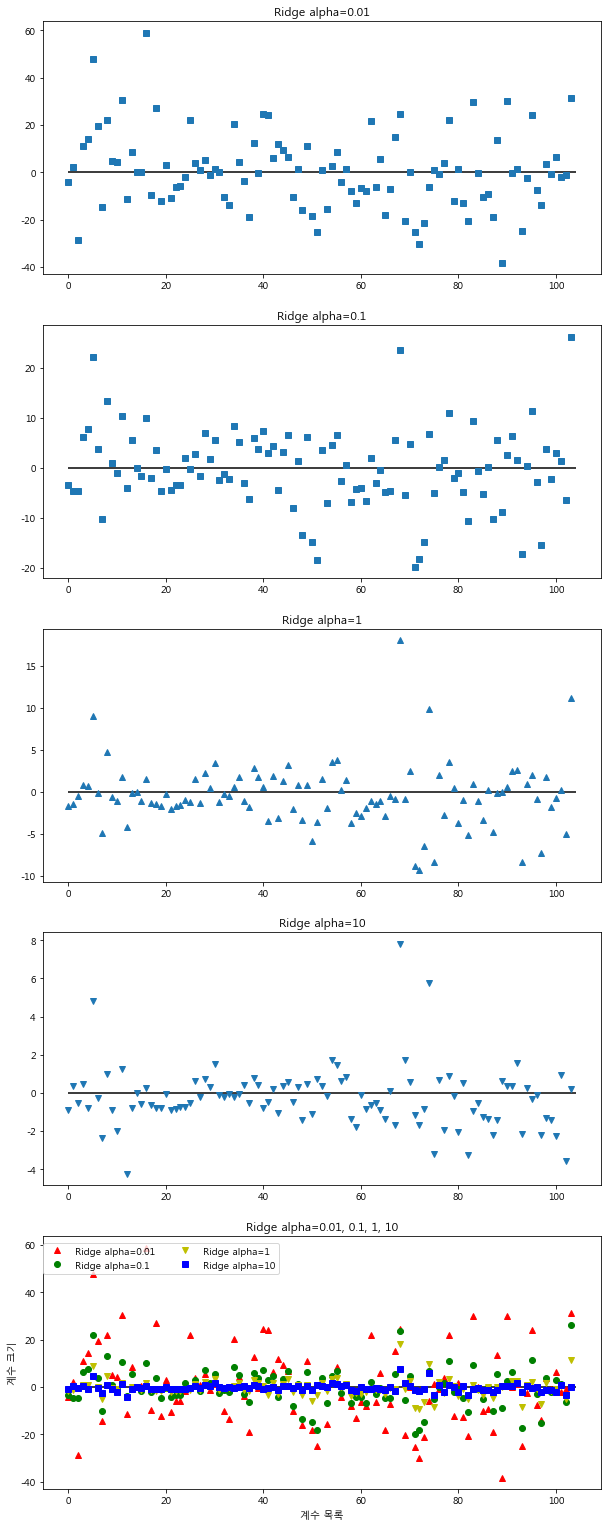

In [41]:
fig = plt.figure(figsize=(10,27))
#ax1 = fig.add_subplot(5, 1, 1)
#ax2 = fig.add_subplot(5, 1, 2)
#ax3 = fig.add_subplot(5, 1, 3)
#ax4 = fig.add_subplot(5, 1, 4)
#ax5 = fig.add_subplot(5, 1, 5)

plt.subplot(5, 1, 1)
plt.hlines(0,0, len(ridge001.coef_))
plt.plot(ridge001.coef_, 's', label="Ridge alpha=0.01")
plt.title('Ridge alpha=0.01')

plt.subplot(5, 1, 2)
plt.hlines(0,0, len(ridge01.coef_))
plt.plot(ridge01.coef_, 's', label="Ridge alpha=0.1")
plt.title('Ridge alpha=0.1')

plt.subplot(5, 1, 3)
plt.hlines(0,0, len(ridge.coef_))
plt.plot(ridge.coef_, '^', label="Ridge alpha=1")
plt.title('Ridge alpha=1')

plt.subplot(5, 1, 4)
plt.hlines(0,0, len(ridge10.coef_))
plt.plot(ridge10.coef_, 'v', label="Ridge alpha=10")
plt.title('Ridge alpha=10')

plt.subplot(5, 1, 5)
plt.hlines(0,0, len(ridge001.coef_))
plt.plot(ridge001.coef_, 'r^', label="Ridge alpha=0.01")
plt.plot(ridge01.coef_, 'go', label="Ridge alpha=0.1")
plt.plot(ridge.coef_, 'yv', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 'bs', label="Ridge alpha=10")
plt.title('Ridge alpha=0.01, 0.1, 1, 10')

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.legend(ncol=2, loc=(0,0.85))
plt.show()

### mglearn을 이용하여 훈련 데이터의 크기를 변화시키며 학습 곡선 확인해 보기
* alpha = 1

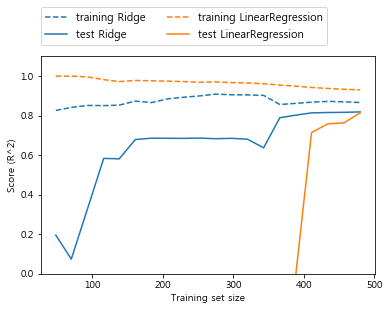

In [42]:
mglearn.plots.plot_ridge_n_samples()

* 모든 데이터 셋에서 TRAINING의 데이터 셋으로 모델 생성의 경우, 일반선형회귀의 r^2의 값이 높다.
* 단, <b>테스트 데이터 셋</b>에서는 모델은 비교시에 <b>릿지 회귀가 Score(r^2)의 값이 높다.</b> 
* 테스트 셋에 대한 경우, 데이터가 많아지면 선형회귀 모델이 릿지 모델에 Score가 거의 가까워진다. 
   * <b>충분한 데이터는 규제항이 덜 중요해져</b> 릿지 회귀와 선형회귀는 같아진다.

### (2) 라쏘 회귀(Lasso) -릿지(Ridge)의 대안 (L1규제)
* 릿지 회귀에서와 같이 w(가중치-계수)의 모든 원소가 0에 가깝게 되길 원한다.(규제)
* 릿지 회귀와 달리 라쏘(Lasso)는 실제로 어떤 계수를 0으로 만든다.- <b> 완전히 제외되는 특성이 발생 </b>
* 라쏘 회귀의 규제 방식은 L1규제라고 하기도 한다.

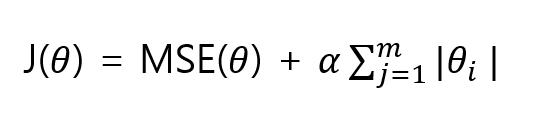

In [48]:
display(Image(filename='img/linear_model02_lasso.png'))

In [49]:
from sklearn.linear_model import Lasso
import numpy as np

In [50]:
lasso = Lasso().fit(X_train, y_train)
print("훈련 데이터 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.27
테스트 데이터 세트 점수 : 0.26


* 기본 라쏘 회귀의 score의 점수가 매우 낮다.

In [51]:
#  특성(feature)가 0이 아닌 것의 개수는?
print("사용한 특성의 수 : {:.2f}".format(np.sum(lasso.coef_ != 0)))

사용한 특성의 수 : 3.00


* 사용한 특성의 수가 매우 작음(3개)



### 라쏘의 alpha을 활용하여 살펴보기

In [52]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ",lasso00001.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso00001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso00001.coef_ != 0))

훈련 데이터 세트 점수 :  0.9435216779425253
테스트 데이터 세트 점수 :  0.811774614752797
사용한 특성의 수 :  94


In [53]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ",lasso001.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso001.coef_ != 0))

훈련 데이터 세트 점수 :  0.8866673907691016
테스트 데이터 세트 점수 :  0.8031797284789994
사용한 특성의 수 :  34


In [54]:
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ",lasso01.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso01.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso01.coef_ != 0))

훈련 데이터 세트 점수 :  0.7471467572418571
테스트 데이터 세트 점수 :  0.6986891797820428
사용한 특성의 수 :  12


In [55]:
lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ",lasso10.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso10.score(X_test, y_test))

훈련 데이터 세트 점수 :  0.0
테스트 데이터 세트 점수 :  -0.03189647654769301


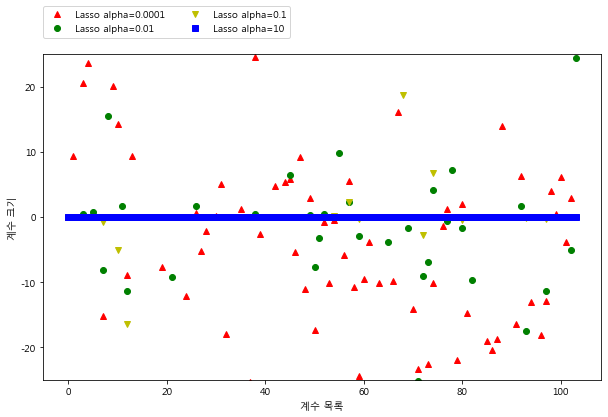

In [56]:
lasso = Lasso(alpha=1).fit(X_train, y_train)

plt.figure(figsize=(10,6))
plt.plot(lasso00001.coef_, "r^", label="Lasso alpha=0.0001")
plt.plot(lasso001.coef_, 'go', label="Lasso alpha=0.01")
plt.plot(lasso01.coef_, 'yv', label="Lasso alpha=0.1")
plt.plot(lasso10.coef_, "bs", label="Lasso alpha=10")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()

* alpha가 적어지면 적어질수록 규제를 받지 않는 모델이 된다.
* 실제의 경우는 보통 릿지 회귀를 선호함. 
* 만약 특성이 많고 일부부만 중요하다면 Lasso가 좋은 선택

## REF
* Ridge와 Lasso : http://statweb.stanford.edu/~tibs/sta305files/Rudyregularization.pdf